## Import Libraries

In [1]:
import numpy as np
import math , copy
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
dataset = pd.read_csv('../input/mobile-price-prediction/Cellphone.csv')
dataset = dataset.drop('Product_id',axis=1)
dataset.columns = ['Price', 'Sale' ,'weight' ,'resoloution' ,'ppi', 'cpu_core', 'cpu_freq' ,'internal_mem' ,'ram', 'RearCam',
            'Front_Cam' , 'battery' , 'thickness']
dataset.head()

,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
dataset.shape[0]

161

## Dataset Splitting

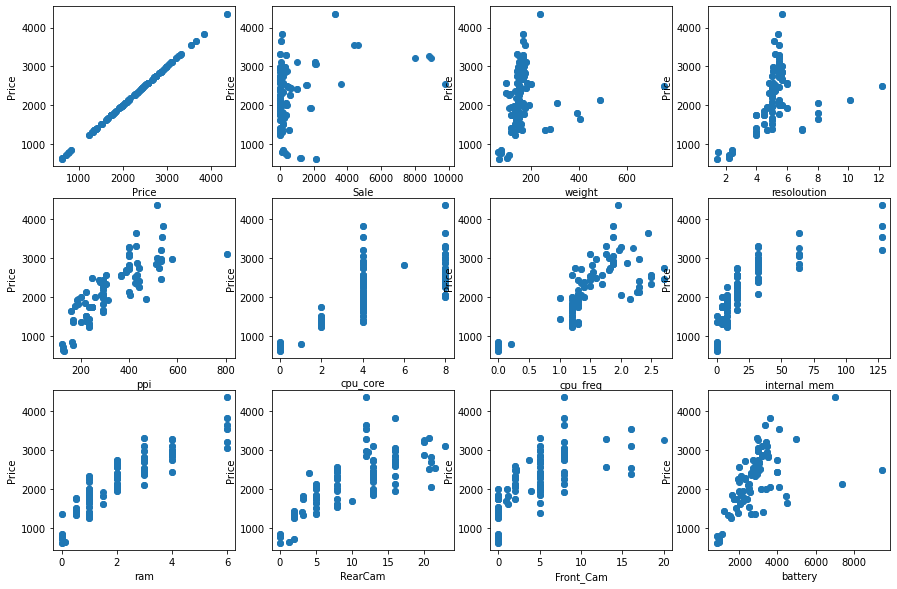

In [4]:
features = dataset.columns
f = 0
fig,ax = plt.subplots(3,4,figsize=(15,10))
for i in range(0,3):
    for j in range(0,4):
        ax[i][j].scatter(dataset[features[f]] , dataset.Price)
        ax[i][j].set_xlabel(features[f])
        ax[i][j].set_ylabel('Price')
        f = f+1
        
plt.show()

In [5]:
X_train = np.array(dataset.iloc[0:100,1:])
X_test = np.array(dataset.iloc[100:161,1:])
y_train = np.array(dataset.iloc[0:100,0])
y_test = np.array(dataset.iloc[100:161,0])

## Compute Cost Function

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  $$ 

In [6]:
b_init = 0
w_init = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [7]:
def cost_function(X,y,b,w):
    m = X.shape[0]
    error = 0.0
    for i in range(m):
        fwb = np.dot(X[i],w) + b
        error = error + (fwb - y[i])**2
    cost = error / (2*m)
    return cost

print(cost_function(X_train,y_train,b_init,w_init))

2569905.105


## Compute Gradient Descent

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$

In [8]:
def Gradient_Descent(X,y,w,b):
    m,n = X.shape
    dw = np.zeros(n)
    db = 0
    
    for i in range(m):
        Fwb = np.dot(X[i],w) + b
        error = Fwb - y[i]
        
        for j in range(n):
            dw[j] = dw[j] + error * X[i,j]
            
        db = db + error
        
    dw = dw / m
    db = db / m
    
    return dw , db

w , b = Gradient_Descent(X_train,y_train,w_init,b_init)
print('bias:',b)
print('weights:',w)

bias: -2172.83
weights: [-1.33213360e+05 -3.67557162e+05 -1.17446522e+04 -7.57616520e+05
 -1.15744200e+04 -3.54646786e+03 -5.66000800e+04 -5.23577232e+03
 -2.39512040e+04 -1.01280160e+04 -6.19993090e+06 -1.79960560e+04]


## Linear Regression with Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [9]:
def gradient_descent(X, y, w_in, b_in, cost_function, Gradient_Descent, alpha, num_iters):
    history = []
    b = b_in
    w = copy.deepcopy(w_in)

    for i in range(num_iters):
        d_w,d_b = Gradient_Descent(X, y, w_in, b_in)
        
        w = w - alpha * d_w
        b = b - alpha * d_b
        
        if i<100000:
            history.append(cost_function(X, y, b, w))
        
        if i% math.ceil(num_iters / 10) == 0:
            print('iteration:',i,' Cost:',history[-1])
                
    return w, b, history

w_final, b_final, J_hist = gradient_descent(X_train,y_train,w_init,b_init,cost_function, Gradient_Descent, 1e-9,10000) 
print("\nb,w found by gradient descent:")
print('bias:',b_final)
print('weights::',w_final)

iteration: 0  Cost: 2530904.248402478
iteration: 1000  Cost: 133333386.5653825
iteration: 2000  Cost: 603403279.3009049
iteration: 3000  Cost: 1412740582.4549284
iteration: 4000  Cost: 2561345296.0274663
iteration: 5000  Cost: 4049217420.018518
iteration: 6000  Cost: 5876356954.429015
iteration: 7000  Cost: 8042763899.258546
iteration: 8000  Cost: 10548438254.506964
iteration: 9000  Cost: 13393380020.17427

b,w found by gradient descent:
bias: 0.02172830000000018
weights:: [1.33213360e+00 3.67557162e+00 1.17446522e-01 7.57616520e+00
 1.15744200e-01 3.54646786e-02 5.66000800e-01 5.23577232e-02
 2.39512040e-01 1.01280160e-01 6.19993090e+01 1.79960560e-01]


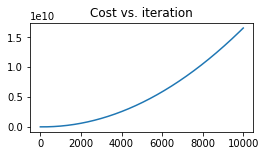

In [10]:
plt.figure(figsize=(4,2))
plt.plot(J_hist)
plt.title("Cost vs. iteration" )
plt.show()

## Prediction

In [11]:
pred = np.zeros(61)
for i in range(0,61):
    pred[i] = np.dot(X_test[i], w_final) + b_final
    print('prediction:', pred[i],'target value:' ,y_test[i])

prediction: 177731.44080944158 target value: 2343
prediction: 70015.4325018594 target value: 833
prediction: 157529.67059264478 target value: 1522
prediction: 177742.0978782416 target value: 2343
prediction: 171547.48403887593 target value: 2744
prediction: 70031.41810505939 target value: 833
prediction: 171555.47684047595 target value: 2744
prediction: 139532.47311657717 target value: 1676
prediction: 139548.45871977718 target value: 1676
prediction: 203328.81748225368 target value: 2858
prediction: 54651.80479833876 target value: 754
prediction: 191019.38537328105 target value: 2975
prediction: 191026.04604128108 target value: 2975
prediction: 54663.79400073876 target value: 754
prediction: 202642.08213121732 target value: 2880
prediction: 203360.78868865367 target value: 2858
prediction: 314143.30487371964 target value: 3287
prediction: 314173.94394651963 target value: 3287
prediction: 229247.0436492999 target value: 2054
prediction: 110058.87854576077 target value: 1734
prediction:

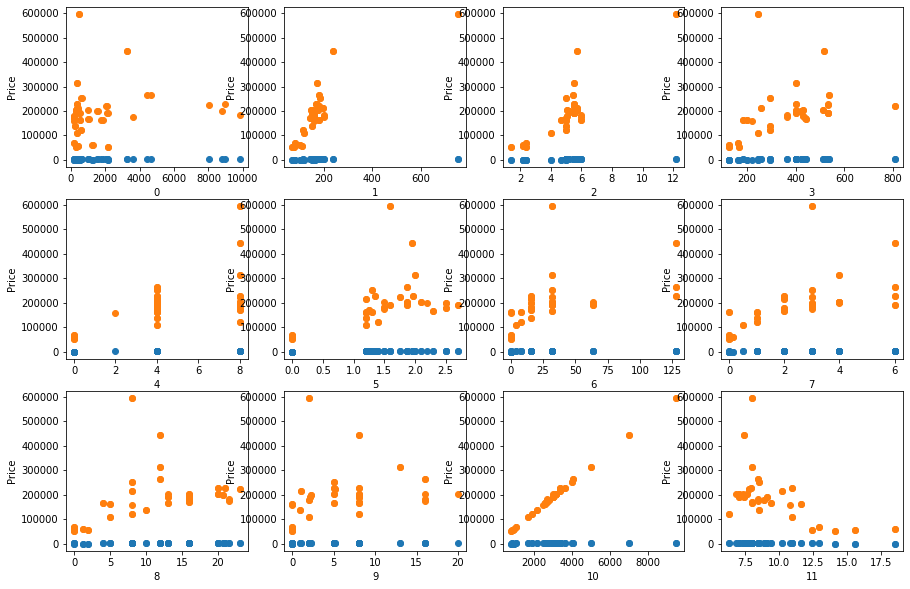

In [12]:
X_test = pd.DataFrame(X_test)
features = X_test.columns
f = 0
fig,ax = plt.subplots(3,4,figsize=(15,10))
for i in range(0,3):
    for j in range(0,4):
        ax[i][j].scatter(X_test[features[f]] , y_test)
        ax[i][j].scatter(X_test[features[f]] , pred)
        ax[i][j].set_xlabel(features[f])
        ax[i][j].set_ylabel('Price')
        f = f+1
        
plt.show()

## Improve Learning Rate by Scaling the Data

In [13]:
def standardization(col):
    mean = X_train[col].mean()
    std = X_train[col].std()
    if (std != 0):
        X_train[col] = X_train[col].map(lambda p : (p-mean)/std)

X_train = pd.DataFrame(X_train)
for i in X_train.columns:
    standardization(i)
    
X_test = pd.DataFrame(X_test)
for i in X_test.columns:
    standardization(i)

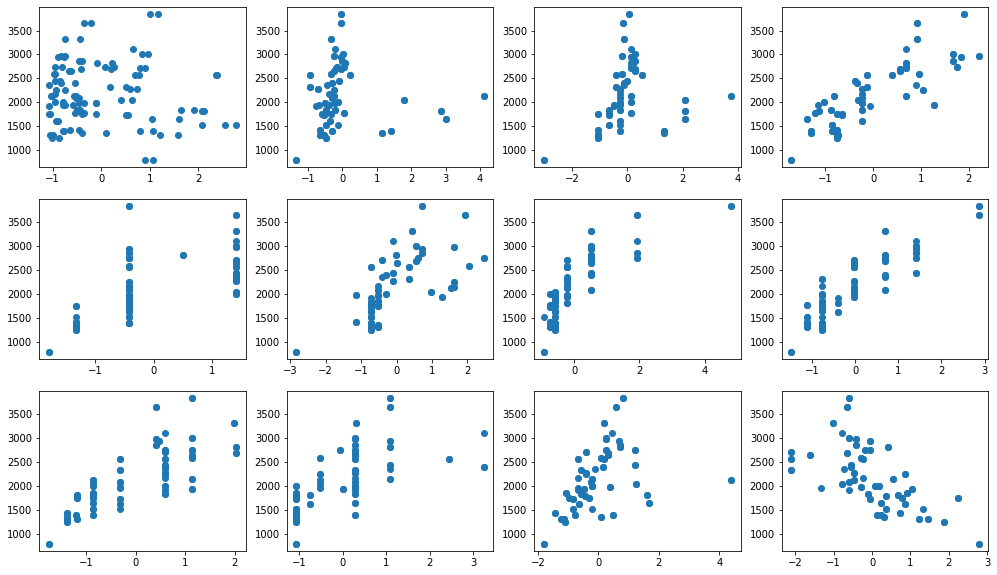

In [14]:
f=0
fig,ax = plt.subplots(3,4,figsize=(17,10))
for i in range(0,3):
    for j in range(0,4):
        ax[i][j].scatter(X_train[f] , y_train)
        f = f+1
        
plt.show()

In [15]:
X_train  = np.array(X_train)
w_final, b_final, J_hist = gradient_descent(X_train,y_train,w_init,b_init,cost_function, Gradient_Descent, 1e-4,10000) 
print("\nb,w found by gradient descent:")
print('bias:',b_final)
print('weights::',w_final)

iteration: 0  Cost: 2569244.296203901
iteration: 1000  Cost: 1979409.4108895713
iteration: 2000  Cost: 1531380.5411285127
iteration: 3000  Cost: 1225157.6869207958
iteration: 4000  Cost: 1060740.8482663643
iteration: 5000  Cost: 1038130.025165179
iteration: 6000  Cost: 1157325.217617209
iteration: 7000  Cost: 1418326.4256225002
iteration: 8000  Cost: 1821133.649181064
iteration: 9000  Cost: 2365746.888292883

b,w found by gradient descent:
bias: 2172.829999999649
weights:: [ -55.36500279  -20.67324904  129.54807406  530.96950834  404.31647787
  422.33912677  511.85920164  571.21753803  499.49912017  407.26143642
  268.30798554 -409.781526  ]


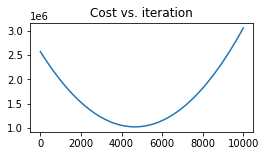

In [16]:
plt.figure(figsize=(4,2))
plt.plot(J_hist)
plt.title("Cost vs. iteration" )
plt.show()

In [17]:
X_test  = np.array(X_test)
for i in range(6):
    pred = np.dot(X_test[i],w_final) + b_final
    print('prediction:',pred,'target value:' ,y_test[i])

prediction: 986410.8176290122 target value: 2343
prediction: 367732.7076221329 target value: 833
prediction: 777258.6555588766 target value: 1522
prediction: 985967.8976066605 target value: 2343
prediction: 967493.6562861986 target value: 2744
prediction: 367068.3275886054 target value: 833


# Using Scikit-Learn

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

### Scale/normalize the training data

In [19]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[3.85910885 5.44285135 6.77942586 3.91850278 3.20125197 5.28632229
 5.74456265 4.3379192  3.78916335 4.30134403 6.19340739 4.88540353]
Peak to Peak range by column in Normalized X:[3.87855033 5.47027143 6.81357936 3.93824348 3.21737929 5.3129538
 5.77350269 4.35977283 3.80825245 4.32301341 6.22460864 4.91001529]


### Create and fit the regression model

In [20]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 65, number of weight updates: 6501.0


### View parameters

In [21]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [  15.67986918  -18.29327538  -36.94808018  115.60037678   98.97573734
   51.85286038  160.05495308  153.10317593   87.92657728  -29.67046636
   57.82806258 -132.23703722], b:[2172.77022351]


### Make predictions

In [22]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[2571.15461981 1487.24627429 2031.34625869 1330.24533997]
Target values 
[2357 1749 1916 1315]
